In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('energy_efficiency', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('energy_efficiency', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('energy_efficiency')
num_tries = 15

dataset_shapes

([8], [2])

In [3]:
# Shape
def get_dims(x, i, o):
    return i - x * (i - o) / 4

for x in range(1,4):
    print(f'{get_dims(x, dataset_shapes[0][0], dataset_shapes[1][0]):.2f}')

6.50
5.00
3.50


### S(X,X,X)

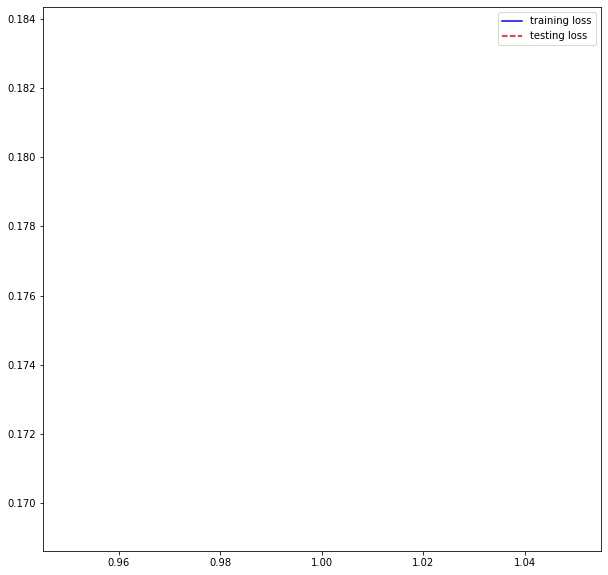

Elapsed training time: 3.05812 sec
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 7)                 63        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [4]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[7,5,4], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(2)

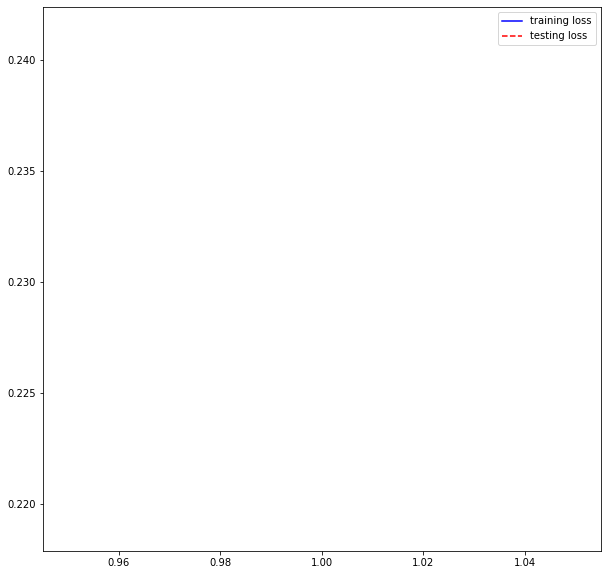

Elapsed training time: 1.12972 sec
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
v_input_2 (VInput)           (None, 9, 4)              36        
_________________________________________________________________
v_fractal_2 (VFractal)       (None, 5, 2)              106       
_________________________________________________________________
v_output_3 (VOutput)         (None, 2)                 0         
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(4,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(3)

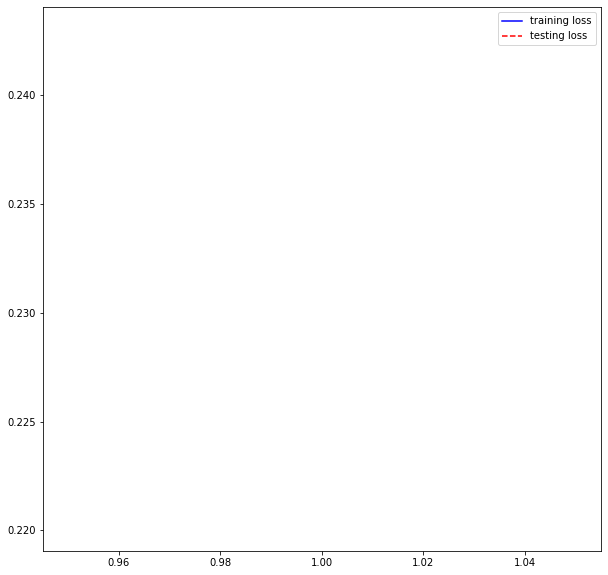

Elapsed training time: 1.23632 sec
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
v_input_4 (VInput)           (None, 9, 3)              27        
_________________________________________________________________
v_fractal_4 (VFractal)       (None, 4, 2)              113       
_________________________________________________________________
v_output_5 (VOutput)         (None, 2)                 0         
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(3,), inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)